In [9]:
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
#import seaborn as sns
from hmmlearn.hmm import GMMHMM
from tqdm import tqdm

In [2]:
pca = pd.read_csv("../../data/pca_5c.csv",index_col=0)
pca.index = pd.to_datetime(pca.index)
pca = pca.sort_index()

In [3]:
X = pca[["pca_0","pca_1"]]
hmm = GMMHMM(n_components=2,n_mix = 5, covariance_type="full")
hmm.fit(X[:]);
hmm.transmat_,hmm.aic(X),hmm.bic(X)

(array([[0.99716703, 0.00283297],
        [0.0024395 , 0.9975605 ]]),
 16784.366450876445,
 17157.509174293256)

<AxesSubplot:xlabel='Date'>

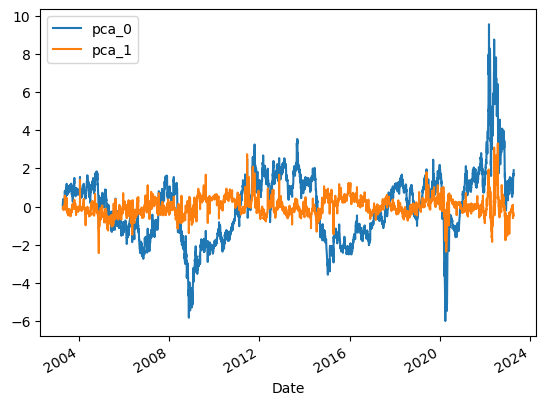

In [101]:
#X.plot()

In [7]:
min_t = 1

In [10]:
result_5 = []
result_10 = []
for t in tqdm(X[X.index>"2010"].index[:200]):
    Xt= X[X.index<=t]
    try:
        hmm_model = best_model(Xt)
    #get result
        A_10 = np.linalg.matrix_power(hmm_model.transmat_,10)
        A_5 = np.linalg.matrix_power(hmm_model.transmat_,5)
        result_5.append(np.sum(A_5)- np.trace(A_5))
        result_10.append(np.sum(A_10)- np.trace(A_10))
    except:
        result_5.append(np.nan)
        result_10.append(np.nan)
        print (t)
result_df = pd.DataFrame()
result_df.index=X[X.index>"2010"].index
result_df["transition_5days"] = result_5
result_df["transition_10days"] = result_5

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:47<00:00,  1.86it/s]


ValueError: Length of values (200) does not match length of index (3428)

In [ ]:
pca_new['status_change'] == 1

In [99]:
#train untill time t
result_5 = []
result_10 = []
for t in tqdm(range(1800,3500)):
    Xt = X[:t]
    try:
        hmm_model = best_model(Xt)
    #get result
        A_10 = np.linalg.matrix_power(hmm_model.transmat_,10)
        A_5 = np.linalg.matrix_power(hmm_model.transmat_,5)
        result_5.append(np.sum(A_5)- np.trace(A_5))
        result_10.append(np.sum(A_10)- np.trace(A_10))
    except:
        result_5.append(np.nan)
        result_10.append(np.nan)
        print (t)

  3%|▎         | 46/1700 [00:25<15:35,  1.77it/s]Model is not converging.  Current: -3867.3223625261053 is not greater than -3848.9854922277104. Delta is -18.336870298394842
Covariance of state #1, mixture #0 has a null eigenvalue.
Covariance of state #1, mixture #1 has a null eigenvalue.
Covariance of state #1, mixture #2 has a null eigenvalue.
100%|██████████| 1700/1700 [24:26<00:00,  1.16it/s]


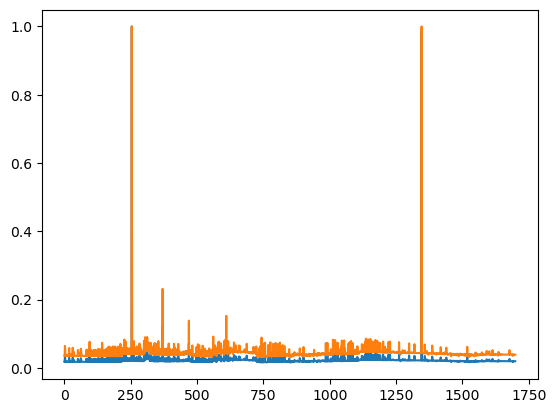

In [100]:
plt.plot(result_5,label="5 day trans")
plt.plot(result_10,label="10 day trans")

In [93]:
def moving_average(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[n:] - cumsum[:-n]) / float(n)

In [95]:
a = [1,2,3,4,5,6,7,8]

In [97]:
avg3 = moving_average(result_10, 3)

In [ ]:
for ts in np.where(pca_new['status_change'] == 1)[0]:
    ax.axvline(ts,color="red")

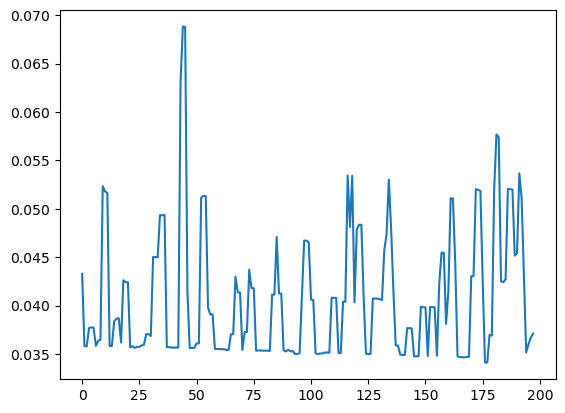

In [98]:
plt.plot(avg3)

array([[0.99744809, 0.00255191],
       [0.00295846, 0.99704154]])

In [3]:
pca_new = pca.iloc[::-1]
pca_new[pca_new['contago'] == 1]
con_arr = np.where(pca_new['contago'] == 1)

In [4]:
pca_new['contago_next'] = pca_new['contago'].shift(-1)

/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_9817/693211707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_new['contago_next'] = pca_new['contago'].shift(-1)


In [5]:
pca_new['status_change'] = np.where(pca_new['contago'] != pca_new['contago_next'], 1,0)

/var/folders/mt/bm2h50kj2872xhymzl24djch0000gn/T/ipykernel_9817/2358109956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_new['status_change'] = np.where(pca_new['contago'] != pca_new['contago_next'], 1,0)


In [6]:
np.where(pca_new['status_change'] == 1)

(array([ 542,  543,  544,  545,  546,  547,  627,  634,  640,  657,  658,
         759,  769,  770,  776,  813,  819,  823,  831, 1075, 1299, 1302,
        1305, 1306, 1307, 1308, 1310, 1312, 1316, 1317, 1318, 1321, 1322,
        1323, 1325, 1327, 1329, 1332, 1333, 1338, 1339, 1957, 1960, 1963,
        1964, 1970, 1973, 1974, 1976, 1977, 1978, 1984, 1989, 2014, 2101,
        2103, 2356, 2361, 2362, 2363, 2930, 3512, 3514, 3516, 3519, 3520,
        3531, 3533, 3536, 3541, 3572, 3579, 3580, 3587, 3601, 3602, 3603,
        3619, 3630, 3683, 3684, 3685, 3696, 3702, 4015, 4016, 4017, 4020,
        4032, 4046, 4326, 4328, 4343, 4531, 5147]),)

In [7]:
len(np.where(pca_new['status_change'] == 1)[0])

95

## Test if HMM capture 10 day in advance

In [8]:
rst_tan = []
for i in range(10):
    hmm = GMMHMM(n_components=2,\
                 n_mix = 3, covariance_type="full")
    X = pca_new[["pca_0","pca_1"]]
    hmm.fit(X[:540])
    hmm.transmat_
    

In [9]:
X = pca_new[["pca_0","pca_1"]]
X[:6]

,pca_0,pca_1
Date,,
2003-04-11,0.053711,-0.092709
2003-04-14,0.273054,-0.011274
2003-04-15,0.265390,-0.092445
2003-04-16,0.242211,-0.119124
2003-04-17,0.367865,-0.074382
2003-04-22,0.405894,-0.121337


In [ ]:
np.sum(hmm.transmat_)- np.trace(hmm.transmat_)

In [ ]:
np.linalg.matrix_power(hmm.transmat_,10)

In [10]:
def hmm_rst_10(pos):
    rst_tan = []
    X = pca_new[["pca_0","pca_1"]]
    for i in range(5):
        hmm = GMMHMM(n_components=2,n_mix = 2, covariance_type="full")
        hmm.fit(X[:pos])
        A_10 = np.linalg.matrix_power(hmm.transmat_,10)
        rst = np.sum(A_10)- np.trace(A_10)
        rst_tan.append(rst)
    return np.average(rst_tan)

In [11]:
def hmm_rst_5(pos):
    rst_tan = []
    X = pca_new[["pca_0","pca_1","pca_2"]]
    for i in range(10):
        hmm = GMMHMM(n_components=2,n_mix = 2, covariance_type="full")
        hmm.fit(X[:pos])
        A_5 = np.linalg.matrix_power(hmm.transmat_,5)
        rst = np.sum(A_5)- np.trace(A_5)
        rst_tan.append(rst)
    return np.average(rst_tan)

In [21]:
A= hmm.transmat_
np.linalg.matrix_power(A,5)

array([[0.81423015, 0.18576985],
       [0.06805193, 0.93194807]])

In [12]:
def hmm_rst_3(pos):
    rst_tan = []
    X = pca_new[["pca_0","pca_1"]]
    for i in range(10):
        hmm = GMMHMM(n_components=2,n_mix = 2, covariance_type="full")
        hmm.fit(X[:pos])
        A_3 = np.linalg.matrix_power(hmm.transmat_,3)
        rst = np.sum(A_3)- np.trace(A_3)
        rst_tan.append(rst)
    return np.average(rst_tan)

In [ ]:
hmm_rst_5(800)

In [ ]:
(X==np.inf).sum()

In [13]:
from tqdm import tqdm

In [ ]:
list_10 = []
wrong_num = []
for i in tqdm(range(1900,2500)):
    #print(i)
    try:
        rst = hmm_rst_10(i)
        list_10.append(rst)
    except:
        wrong_num.append(i)
        list_10.append(np.nan)

In [14]:
list_5 = []
wrong_num = []
for i in tqdm(range(1900,2500)):
    #print(i)
    try:
        rst = hmm_rst_5(i)
        list_5.append(rst)
    except:
        wrong_num.append(i)
        list_5.append(np.nan)

100%|██████████| 600/600 [10:24<00:00,  1.04s/it]


In [15]:
list_3 = []
wrong_num = []
for i in tqdm(range(1900,2500)):
    #print(i)
    try:
        rst = hmm_rst_3(i)
        list_3.append(rst)
    except:
        wrong_num.append(i)
        list_3.append(np.nan)

100%|██████████| 600/600 [10:36<00:00,  1.06s/it]


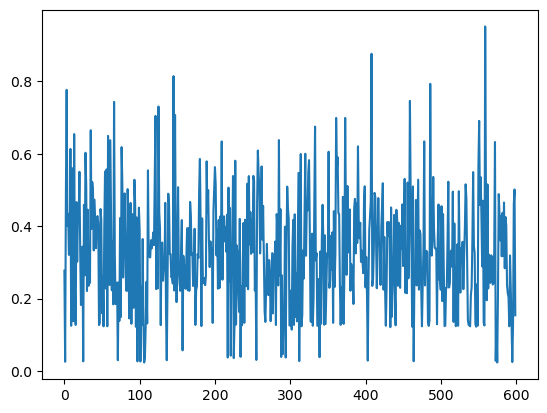

In [16]:
plt.plot(list_5)

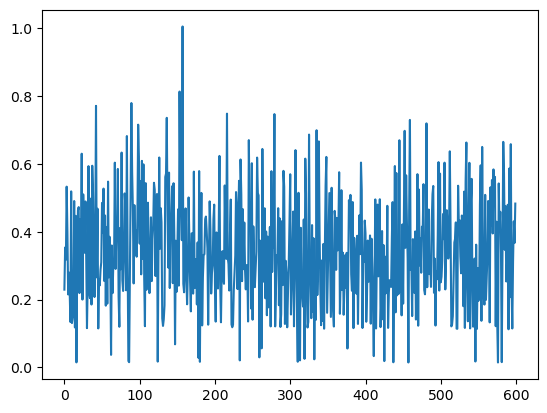

In [17]:
plt.plot(list_3)

In [ ]:
ts

NameError: name 'list_all' is not defined

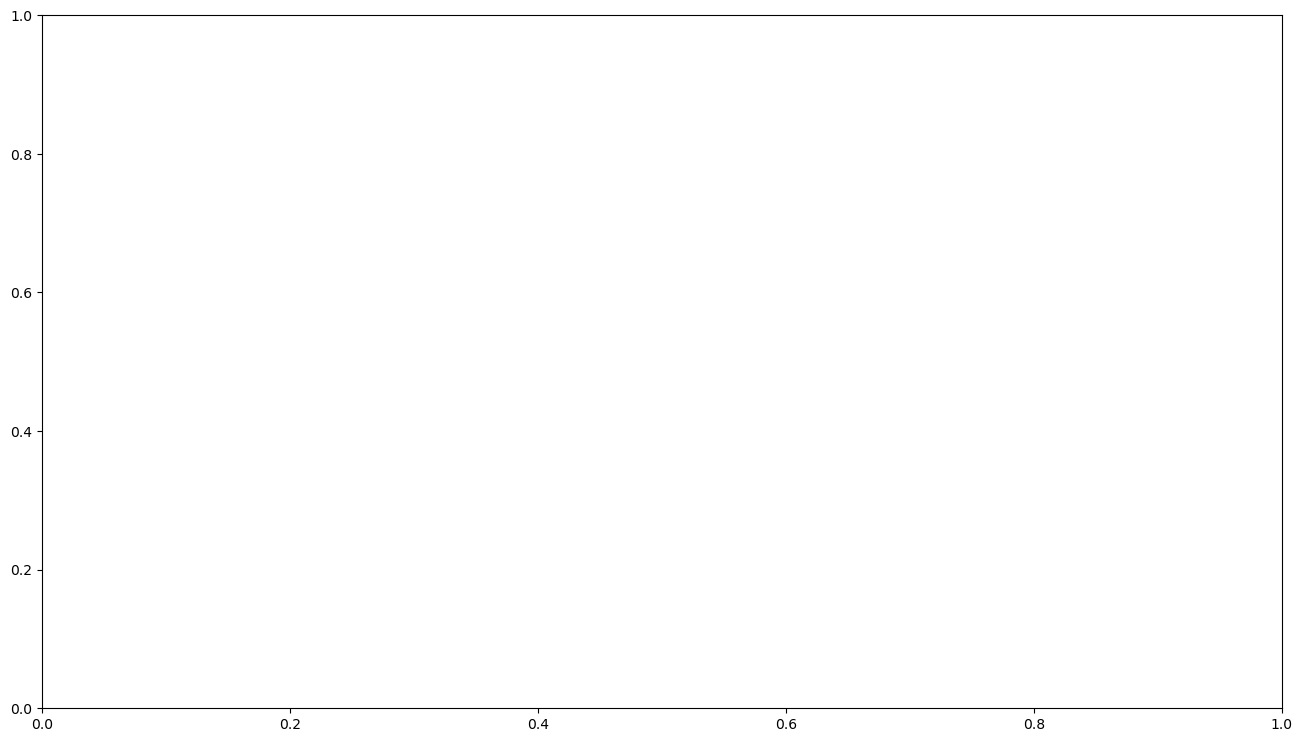

In [6]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plt.plot(list_all)
for ts in np.where(pca_new['status_change'] == 1)[0]:
    ax.axvline(ts,color="red")

In [12]:
def train_hmm(data):
    hmm = GMMHMM(n_components=2,n_mix = 3, covariance_type="full")
    hmm.fit(data);
    return hmm

def best_model(data,n=5):
    hmm_list = [train_hmm(data) for i in range(n)]
    aic_list=[model.aic(data) for model in hmm_list]
    return hmm_list[np.argmin(aic_list)]

def sum_off_diagonal(A):
    return np.sum(A)- np.trace(A)